<a href="https://colab.research.google.com/github/roheth286/EDA-CUSTOMER-SPENDING-BEHAVIOUR/blob/main/EDA_Customer_Spending_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI/ML Task**
Conduct an exploratory data analysis (EDA) to analyze customer spending behavior, product preferences, and overall purchasing trends to gain insights into their habits and characteristics.

---



Step-by-Step Breakdown:

*  Data Preparation

  1. Loaded the cleaned dataset

  2. Standardized numerical features to ensure proper scaling for clustering and visualization.

*  Exploratory Data Analysis (EDA)
  1. General Summary
  1. Box Plot (Purchase Frequency vs. Purchase Amount)

  2. Pie Chart (Product Category Preferences)

  3. Scatter Plot (Income vs. Purchase Amount)
  
  4. Count Plot (Loyalty Status vs. Promotion Usage)
  

*  Customer Segmentation

  1. Clustering customers based on spending habits.


*  Insights & Marketing Strategies

  1. Generated inferences from each graph to understand customer behaviors.

  2. Suggested targeted marketing strategies for customer engagement, retention, and promotions based on insights.



# **Dataset of Customer Spending Behaviour**


---

Save the dataset to your local system and upload it when prompted in the import dataset cell.

Link: https://drive.google.com/file/d/1F65Br7-pkcTZ05d9JG_-qdsKCd_WOyKo/view

# **Import necessary libraries**



---



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from google.colab import files
import pandas as pd

# **Import Dataset**



---



1.   User prompt to upload the csv file.
2.   Reads the customer_data.csv file into a Pandas DataFrame (df).



3.   Extracting Unique Values – Prints the unique values for the categorical columns: loyalty_status, purchase_frequency, satisfaction_score, and product_category.




In [ ]:



uploaded = files.upload()

# Get the filename dynamically
filename = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(filename)



print("Unique values in loyalty status:", df['loyalty_status'].unique())
print("Unique values in purchase_frequency:", df['purchase_frequency'].unique())
print("Unique values in satisfaction_score:", df['satisfaction_score'].unique())
print("Unique values in Product Category:", df['product_category'].unique())


Saving customer_data.csv to customer_data.csv
Unique values in loyalty status: ['Gold' 'Regular' 'Silver']
Unique values in purchase_frequency: ['frequent' 'rare' 'occasional']
Unique values in satisfaction_score: [ 6  7  5  3  4  2  8  9  1 10  0]
Unique values in Product Category: ['Books' 'Clothing' 'Food' 'Electronics' 'Home' 'Beauty' 'Health']


# **Data Cleaning**



---

In this section, we performed essential data cleaning steps to ensure the dataset is ready for analysis.

1. Checked for Missing Values

2. Handle missing values

3. Remove duplicate rows

4. Categorical Encoding – Converted categorical columns into the appropriate format for easier processing in later stages.

5.  Fix incorrect data types (if necessary)

 Example: Convert income to integer (assuming it's numeric).

6. Standardize numerical data (optional)


7.  Verify final dataset


In [ ]:

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values
# Fill numerical columns with their mean
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical columns with their mode (most frequent value)
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("\nMissing values after filling:")
print(df.isnull().sum())

# Remove duplicate rows
print("\nNumber of duplicate rows before removal:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after removal:", df.duplicated().sum())

# Convert categorical features to appropriate types
df['gender'] = df['gender'].astype('category')
df['region'] = df['region'].astype('category')
df['loyalty_status'] = df['loyalty_status'].astype('category')
df['product_category'] = df['product_category'].astype('category')

# Fix incorrect data types
df['income'] = pd.to_numeric(df['income'], errors='coerce')


scaler = StandardScaler()
df[['purchase_amount']] = scaler.fit_transform(df[['purchase_amount']])



print(df.info())

# Save cleaned dataset
df.to_csv('/content/cleaned_customer_data.csv', index=False)

print("\n Dataset cleaning complete!")


Missing values per column:
id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

Missing values after filling:
id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   id                  100000 non-null  

#  **Exploratory Data Analysis**

---
Performed Exploratory Data Analysis (EDA) by analyzing customer data through various visualizations.





**General Summary**


---



* Displays statistical data fo the the numeric categories.

* Lists the unique value counts for categorical categories.

In [ ]:

numerical_summary = df.describe()
print(numerical_summary)
# List of categorical features
categorical_features = ['gender', 'education', 'region', 'loyalty_status', 'purchase_frequency', 'product_category', 'promotion_usage' ]

# Summary for categorical variables
categorical_summary = {feature: df[feature].value_counts() for feature in categorical_features}


for feature, summary in categorical_summary.items():
    print(f"Summary for {feature}:\n{summary}\n")


                  id            age         income  purchase_amount  \
count  100000.000000  100000.000000  100000.000000     1.000000e+05   
mean    50000.500000      30.003260   27516.269880     7.176482e-17   
std     28867.657797       4.480535   12996.782587     1.000005e+00   
min         1.000000      12.000000    5000.000000    -1.774585e+00   
25%     25000.750000      27.000000   16271.750000    -8.442435e-01   
50%     50000.500000      30.000000   27584.500000    -3.808686e-02   
75%     75000.250000      33.000000   38747.250000     7.741123e-01   
max    100000.000000      49.000000   50000.000000     3.452411e+00   

       promotion_usage  satisfaction_score  
count    100000.000000       100000.000000  
mean          0.300800            5.009650  
std           0.458608            1.038714  
min           0.000000            0.000000  
25%           0.000000            4.000000  
50%           0.000000            5.000000  
75%           1.000000            6.000000  


**Box Plot (Purchase Frequency vs. Purchase Amount)**


---



* Displays the distribution of purchase amounts across different purchase frequency categories (Frequent, Occasional, Rare)

* Shows their medians, ranges, and outliers

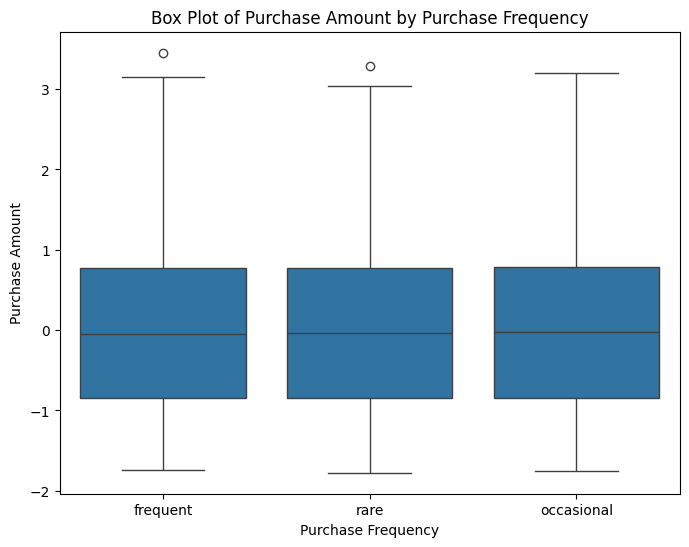

In [ ]:


plt.figure(figsize=(8, 6))

# Create the box plot
sns.boxplot(x=df["purchase_frequency"], y=df["purchase_amount"])


plt.xlabel("Purchase Frequency")
plt.ylabel("Purchase Amount")
plt.title("Box Plot of Purchase Amount by Purchase Frequency")


plt.show()


**Pie Chart (Product Category Preferences)**

---



* The pie chart represents the distribution of different product categories among customers.
*  Each slice indicates the percentage of customers who prefer a particular category.
* This helps in understanding customer preferences and focusing marketing strategies on the most popular categories.

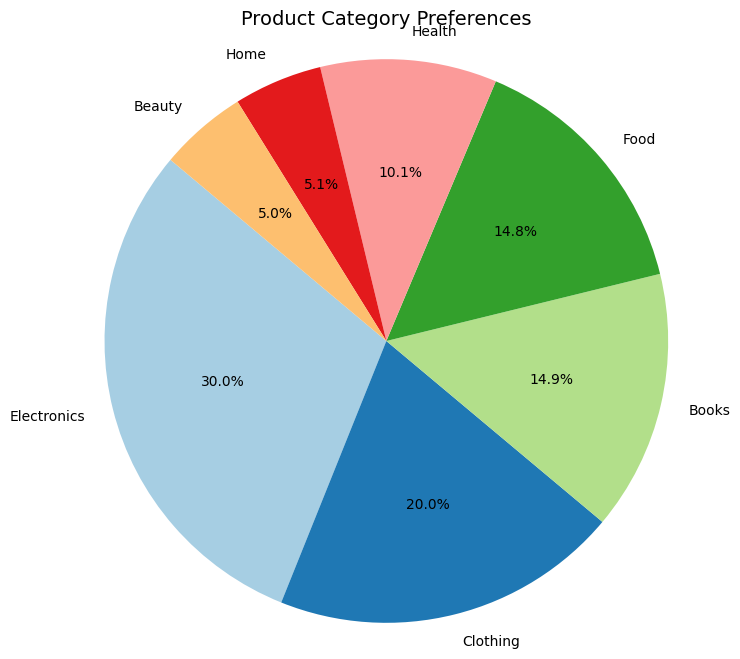

In [ ]:
import matplotlib.pyplot as plt

# Count the number of purchases per product category
category_counts = df['product_category'].value_counts()

# Set figure size
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Titles and labels
plt.title("Product Category Preferences", fontsize=14)
plt.axis('equal')

# Show the plot
plt.show()


**Scatter Plot (Income vs. Purchase Amount)**

---



* The scatter plot illustrates the relationship between income and purchase amount.
* Each point represents an individual customer.

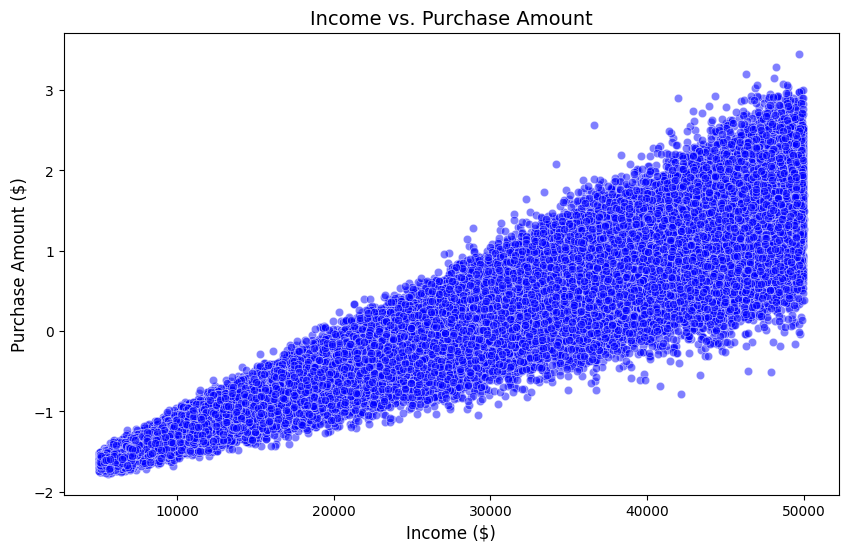

In [ ]:



plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(x=df['income'], y=df['purchase_amount'], alpha=0.5, color='blue')

plt.title("Income vs. Purchase Amount", fontsize=14)
plt.xlabel("Income ($)", fontsize=12)
plt.ylabel("Purchase Amount ($)", fontsize=12)


plt.show()


**Count Plot (Loyalty Status vs. Promotion Usage)**

---



* This count plot shows how different loyalty status groups engage with promotions.
* This helps in designing better customer retention strategies.

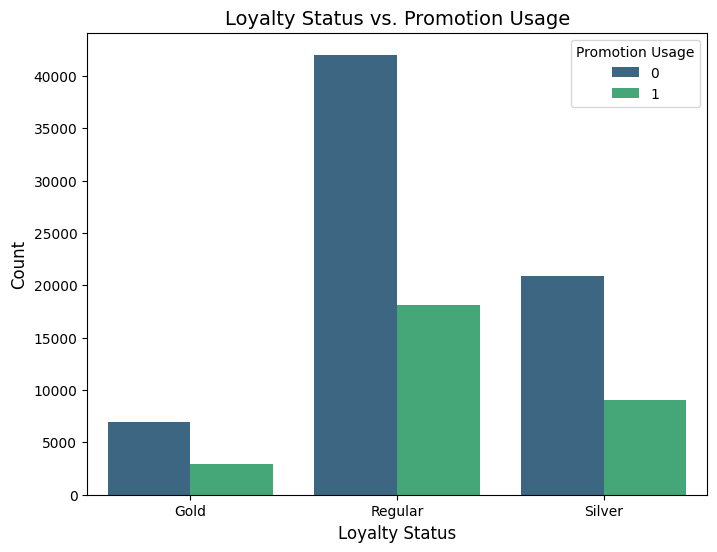

In [ ]:


plt.figure(figsize=(8, 6))

# Create count plot
sns.countplot(x=df['loyalty_status'], hue=df['promotion_usage'], palette='viridis')


plt.title("Loyalty Status vs. Promotion Usage", fontsize=14)
plt.xlabel("Loyalty Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Promotion Usage", labels=["0", "1"])


plt.show()


#  **Customer Segmentation**

---
Customer segmentation involves grouping customers based on similar characteristics, such as spending habits and purchase frequency.




**Customer Segmentation**

---

What is Clustering?



*   Clustering is a technique used in data analysis to group similar items together. In the case of customers, we can use clustering to group customers who have similar buying behavior or characteristics. The goal of clustering is to divide your data into groups (or clusters) where each group is internally similar, but different from other groups.





What is KMeans Clustering?



*  KMeans is one of the most commonly used clustering algorithms. It divides your data into K clusters, where K is a number you decide before running the algorithm. So, KMeans tries to find K groups of data points that are as similar to each other as possible.




How Do We Find the Optimal K? (Elbow Method)

* One of the most popular ways to find the optimal number of clusters is using the Elbow Method. Here’s how it works:

  1. Run KMeans for Different Values of K: We start by running the KMeans algorithm with different values of K (for example, starting from K=1 up to K=10).
  1. Measure the WCSS (Within-Cluster Sum of Squares): For each K value, we calculate a number called WCSS. WCSS tells us how "tight" the clusters are — the lower the WCSS, the better the clusters are at grouping similar data.
  1. Plot the Elbow Graph: We then plot the WCSS values for each K value on a graph. The x-axis represents the number of clusters (K), and the y-axis represents the WCSS value.
  1. Look for the "Elbow": As K increases, WCSS decreases. But, at some point, the decrease in WCSS starts to slow down significantly. This point is called the elbow. The K value at this elbow is considered the optimal number of clusters.



What Does the Elbow Point Tell Us?

*  The elbow point is where the addition of more clusters does not significantly improve the clustering. It’s like when you keep adding more groups, but the improvement in how well the data fits into those groups becomes smaller and smaller.

In This Case:
 *  When we ran the Elbow Method, we looked at the plot of WCSS values. We saw that at K=3, the WCSS decrease slowed down, meaning that adding more clusters didn’t significantly improve the result. Therefore, K=3 is the optimal number of clusters for your data.

What Does This Mean for Customer Segmentation?
 * Now that we know 3 is the best number of clusters, we can use that to segment your customers into three groups based on their spending habits:

  1. Cluster 1 : High-frequency and high-spending customers.
  1. Cluster 2 : Medium-frequency and moderate-spending customers.
  1. Cluster 3 : Low-frequency and low-spending customers.


<ipython-input-9-71d1980d9ab7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['purchase_frequency'] = df['purchase_frequency'].map(freq_mapping)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: Use

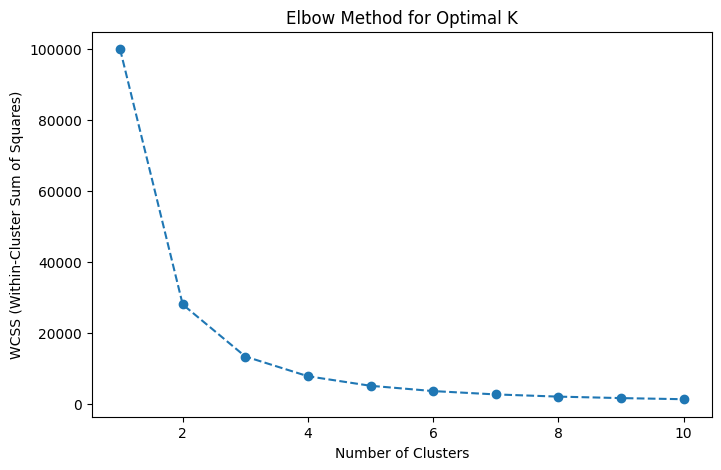

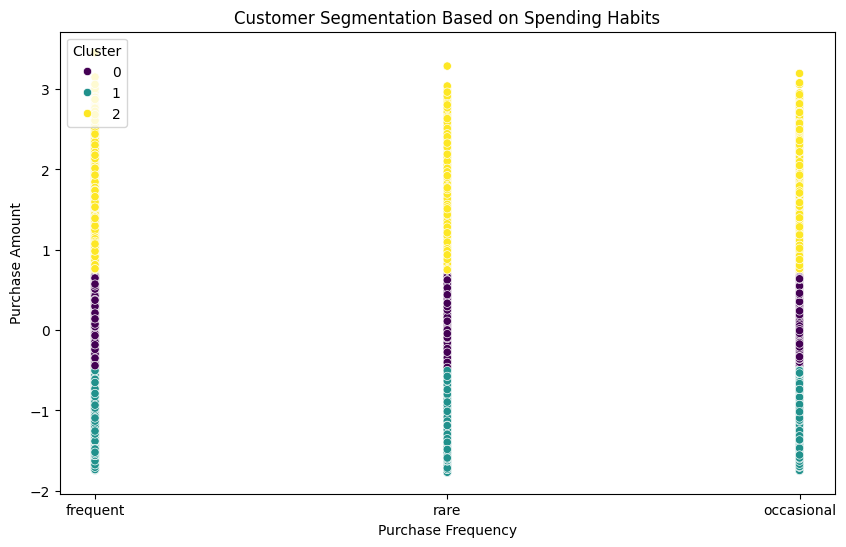

Cluster
0    36329
1    36231
2    27440
Name: count, dtype: int64


In [ ]:

#  Load the cleaned dataset
df = pd.read_csv('/content/cleaned_customer_data.csv')

#  Select relevant features for segmentation (purchase frequency and purchase amount)
features = df[['purchase_frequency', 'purchase_amount']]

# Convert categorical 'purchase_frequency' to numerical values
if df['purchase_frequency'].dtype == 'object':
    freq_mapping = {'Rare': 1, 'Occasional': 2, 'Frequent': 3}
    features['purchase_frequency'] = df['purchase_frequency'].map(freq_mapping)

#  Feature Scaling (Standardization)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)  # Scale the features

#Handle Missing Values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Use 'mean' for numerical columns, 'most_frequent' for categorical columns
features_scaled_imputed = imputer.fit_transform(features_scaled)  # Impute missing values

#  Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(features_scaled_imputed)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph to find the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

#  Apply K-Means Clustering with optimal K
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(features_scaled_imputed)  # Assign cluster labels to the original dataframe

#  Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['purchase_frequency'], y=df['purchase_amount'], hue=df['Cluster'], palette='viridis')
plt.xlabel('Purchase Frequency')
plt.ylabel('Purchase Amount')
plt.title('Customer Segmentation Based on Spending Habits')
plt.legend(title="Cluster")
plt.show()

#  Display the number of customers in each cluster
print(df['Cluster'].value_counts())

# Save the dataset with cluster labels to a new CSV file
df.to_csv('/content/customer_segments.csv', index=False)


#  **Insights & Marketing Strategies**

---

1. Analyzed each graph to derive insights into customer behavior patterns.

2. Proposed marketing strategies tailored for engagement, retention, and promotions based on the findings.

**Box Plot of purchase amount and purchase frequency**

---

Inferences from the Box Plot:

* Similar Distribution of Purchase Amount Across Categories:

  1. The boxes for all three categories (Frequent, Rare, Occasional) are
  of similar size, suggesting that the distribution of purchase amounts is quite consistent across these categories.

  2. The line through the middle of each box, which is close to 0 for all categories, implies that the median purchase amount is very similar for all three categories, indicating that overall spending behavior is balanced across these categories.

* Slight Variation in Range of Purchase Amount (Whiskers):

  1. The whiskers are roughly the same for all categories, with the maximum whisker for the "Occasional" category being slightly higher than the others. This suggests that occasional purchasers can have higher spending amounts than frequent and rare purchasers, which may imply that occasional customers sometimes make larger, one-off purchases.

* Outliers in Frequent and Rare Categories:

  1. There are circles (outliers) in both the Frequent and Rare categories. The presence of these outliers suggests that there are customers in these segments with exceptionally high purchase amounts compared to the rest of the group.

  2. The circle for "Frequent" is higher than the one for "Rare," which could indicate that the frequent customers are likely to have both regular purchases as well as occasional high-value purchases, while rare customers may only occasionally spend significantly.




Marketing Strategies:

* Target Occasional Purchasers with Premium Offers:

  1. Since "Occasional" customers have a slightly higher range of spending (as shown by the higher whisker), marketing strategies can focus on offering high-value, limited-time offers, or premium products/services that entice these customers to spend more during their rare purchases. Consider offering incentives like "Occasional Customer Special Deals" that reward these customers for spending more in a single purchase.

* Loyalty Programs for Frequent Customers:

  1. The frequent customers seem to have consistent spending patterns, but they also have some high-value outliers. To maximize this behavior, consider implementing a tiered loyalty program that rewards customers based on their cumulative spending over time. The outliers suggest that some frequent customers may be more valuable than the typical ones, so special rewards for high-spending frequent customers could encourage them to maintain or increase their spending.

* Retention Campaigns for Rare Customers:

  1. The rare customers might benefit from personalized retention strategies, as the presence of outliers in the "Rare" category indicates that there may be a small subset of customers who make significant purchases from time to time. To engage this group, create exclusive campaigns or offers that encourage them to transition from "rare" to "occasional" purchasers. For example, limited-time discounts or targeted ads highlighting products they’ve previously shown interest in can trigger higher spending.
















**Pie Chart of Product Category Preferences**

---

Inferences from the Pie Chart:

* Electronics Dominates Consumer Preference:

  1. With 30% of customers preferring electronics, this is the most popular product category. It indicates that the majority of customers in the dataset are likely tech-savvy or interested in high-tech products. Electronics is the dominant segment, so marketers should focus on promoting new tech gadgets, special offers, or tech-related services to this large group.

* Clothing and Books Have Substantial Share:

  1. Clothing (20%) and Books (14.9%) are also significant categories, which means there is a notable interest in fashion and reading. These two categories combined represent nearly 35% of customer preferences, highlighting a diverse customer base with interests ranging from personal style to intellectual pursuits.

  2. Marketers could target these segments with seasonal clothing sales, promotions on trending books, or special discounts on popular clothing lines to capture the attention of these customers.



* Smaller but Noteworthy Categories (Food, Health, Home, and Beauty):

  1. Food (14.8%), Health (10.1%), Home (5.1%), and Beauty (5%) categories represent more niche interests but still have meaningful portions of the market.

  2. These segments might suggest that customers value not only luxury and entertainment but also wellness and lifestyle products. Marketing strategies for these segments could include emphasizing product quality, health benefits, convenience, and lifestyle improvement in advertisements.




Marketing Strategies:

* Electronics-Focused Promotions:

  1. As electronics is the most popular category, launching targeted campaigns such as early access to new tech releases, exclusive discounts on gadgets, or loyalty rewards for repeat electronics buyers could drive further engagement. Consider using email marketing or social media ads to keep tech enthusiasts informed about the latest products and deals.

* Seasonal Campaigns for Clothing and Books:

  1. Since clothing and books make up a large portion of preferences, marketers should develop seasonal collections and book club memberships. Promotions like "Summer Fashion Sale" or "Winter Reads" could engage customers more effectively. Providing bundle offers (e.g., "Buy 2 books, get 1 free") or discounts on fashion items during key times of the year (like festivals or holidays) would encourage higher engagement in these segments.

* Targeted Ads for Niche Segments (Food, Health, Home, and Beauty):

  1. For food, health, home, and beauty categories, create personalized ads that cater to these specific interests. For example, promote healthy snack options for food lovers, wellness products for health-conscious customers, home improvement items for home enthusiasts, and beauty care products with promotions like Buy 1, Get 1 Free or special skincare bundles.

**Scatter Plot of Income vs Purchase Amount**

---

Inferences from the Scatter Plot:

* Linear Relationship:

  1. There is a straight upward trend, meaning as income increases, the purchase amount also increases. This suggests that higher-income individuals tend to spend more, aligning with the common assumption that purchasing power grows with income.

* Higher Income = Greater Variability in Spending:

  1. The variation in purchase amounts increases as income rises. This indicates that while low-income customers may have more consistent spending habits, high-income customers show a wider range of purchasing behavior. Some may spend significantly more, while others may be more moderate in their spending.

* Proportional Increase in Purchase Amounts:

  1. The breadth increases with income, implying that not only do high-income individuals tend to spend more, but a larger portion of high-income individuals are also engaging in purchasing behavior. This could mean that as individuals earn more, they are more likely to make purchases, or it might simply reflect a higher number of data points in the higher-income brackets.

Marketing Strategies:

* Target High-Income Segments with Personalized Offers:

  1. Since high-income individuals show greater variation in purchase amounts, you can tailor marketing strategies to offer high-value personalized products or premium services to this group. For example, special offers for luxury products or personalized experiences could resonate well with these customers.

* Focus on Increasing Engagement for Low-Income Segments:

  1. Although the purchase amount is lower for low-income customers, you can design campaigns to increase their spending. Offering discounts, loyalty programs, or affordable bundles could help incentivize these customers to purchase more frequently or increase their average purchase amount.

* Develop Tiered Marketing Campaigns:

  1. Given the breadth of data points increasing with income, segment your marketing campaigns into tiers based on income. For example, target high-income customers with premium products and services, while offering budget-friendly or value-based solutions to low and middle-income segments.


**Count Plot of loyalty status and Promotion Usage**

---

Inferences from the Box Plot:

* Promotion Usage is Higher Among Regular Customers:

  1. Regular customers are the most engaged with promotional offers, though the exact proportion is uncertain. This indicates that regular customers are more likely to take advantage of promotions than gold or silver customers.Regular customers may be more price-sensitive or motivated by discounts, which could explain their higher usage of promotions.


* Promotion Usage Across All Loyalty Statuses is Low:

  1. All loyalty statuses (gold, silver, and regular) have more "0" (didn’t use promotion) than "1" (used promotion), indicating that promotion usage is generally low across the board.Although regular customers use promotions more than gold or silver, the overall low engagement across all loyalty groups suggests that promotions might not be as effective in encouraging purchases. This could point to the need for better-targeted promotions.

* Promotion Usage Variability is Highest Among Regular Customers:

  1.  The difference in promotional usage between "0" and "1" is the greatest among regular customers, followed by silver and then gold. Regular customers show a larger contrast between promotion users and non-users.This suggests that regular customers have diverse purchasing behaviors. Some are very price-sensitive and take advantage of promotions, while others do not engage at all. This could mean that different types of promotions or incentives may be required for different customer segments.





Marketing Strategies:

* Targeted Promotions for Regular Customers:

  1.  Given that regular customers are the most likely to engage with promotions, it is essential to tailor promotions specifically for this group. Offering time-sensitive or exclusive promotions (e.g., flash sales, loyalty discounts) could increase engagement.Example: Regular customers could be incentivized with personalized emails or app notifications about special offers, encouraging them to make frequent purchases.

* Consider Personalized Promotions Based on Usage Patterns:

  1. Since regular customers show a diverse range of promotion usage, there is potential to use personalized marketing strategies. For example, customers who don’t engage with promotions could be targeted with different types of incentives (e.g., rewards points or exclusive early access to new products).Example: Regular customers who don’t use promotions could receive special offers that are more aligned with their purchase habits (e.g., discounts on items they frequently buy).

* Leverage Loyalty Tiers with Exclusive Offers:

  1. Gold and silver customers tend to have more uniform promotion usage, which suggests that they may be less price-sensitive. For these segments, marketers can focus on offering more exclusive or experience-based rewards (e.g., VIP-only sales or personalized offers).Example: Gold customers could receive early access to new product launches or special invitations to events, while silver customers could benefit from member-only deals.

**Customer Segmentation based on spending habits**

---



Inferences from the Segementattion:

* Distinct Spending Patterns Exist Among Customers:

  1. The segmentation confirms that customers naturally fall into three categories: high spenders with frequent purchases, moderate spenders with average frequency, and low spenders with rare purchases. This indicates a diverse customer base with varying engagement levels.

* The Majority of Revenue Likely Comes from Cluster 1:

  1. High-frequency, high-spending customers (Cluster 1) are the most valuable group, contributing the most to total revenue. Retaining and expanding this segment is crucial for business growth..

* The clusters are relatively well-balanced:

  1.  Cluster 0 and Cluster 1 having almost equal numbers of customers, while Cluster 2 has fewer customers. This suggests that customer spending habits naturally fall into three nearly equal groups, but Cluster 2 is noticeably smaller, possibly indicating a niche customer segment with distinct behaviors..

Marketing Strategies:

* Exclusive Benefits for High-Value Customers (Cluster 1):

  1.  Offer loyalty rewards, VIP programs, and early access to sales to ensure continued engagement and brand loyalty among high spenders.

* Personalized Promotions for Moderate Spenders (Cluster 2):

  1. Introduce targeted discounts or bundled offers to encourage them to increase their spending and move toward Cluster 1.

* Win-Back Campaigns for Low-Engagement Customers (Cluster 3):

  1. Use reactivation strategies such as email reminders, limited-time offers, or personalized recommendations to encourage more frequent shopping and prevent churn..






